### Start with imports

In [162]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

### 1. Load Data

In [163]:
df = pd.read_csv('data/data.csv', encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")


### 2. Explore Data Set

In [164]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [166]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### 3. Missing Data

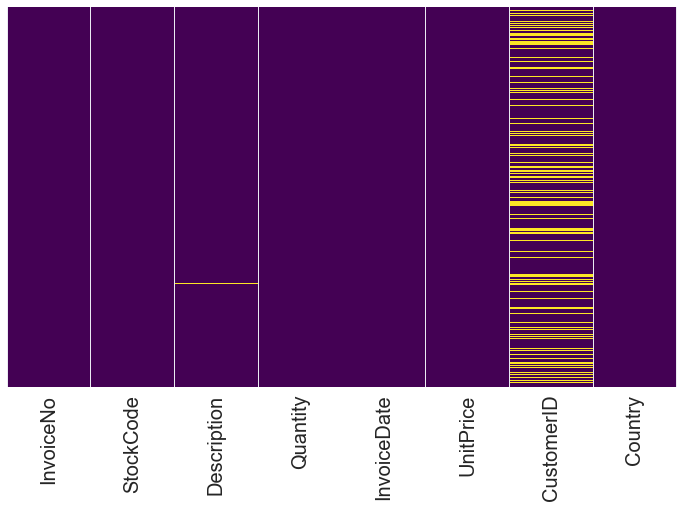

In [167]:
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

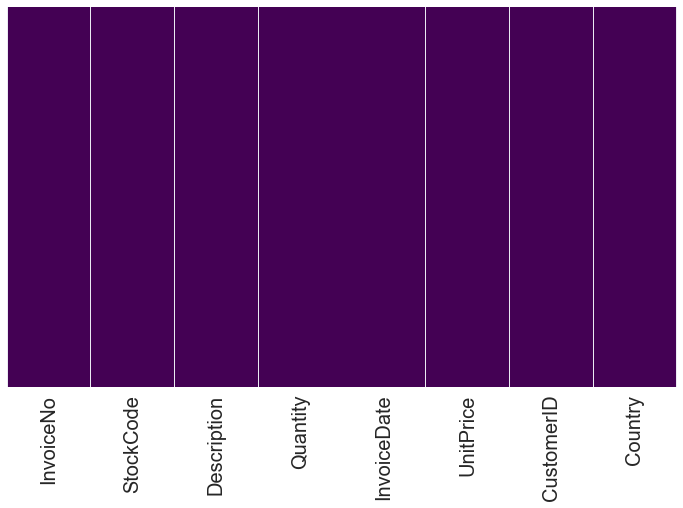

In [168]:
df = df[pd.notnull(df['CustomerID'])] 
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [169]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### 4. Feature Engineering
### 4.1 Weekday

In [170]:
df['weekday'] = pd.to_datetime(df['InvoiceDate'], errors='coerce').dt.dayofweek

**Day to number mapping:**
> * **Monday**: `0`
* **Tuesday**: `1`
* **Wednesday**: `2`
* **Thursday**: `3`
* **Friday**: `4`
* **Saturday**: `5`
* **Sunday**: `6`

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


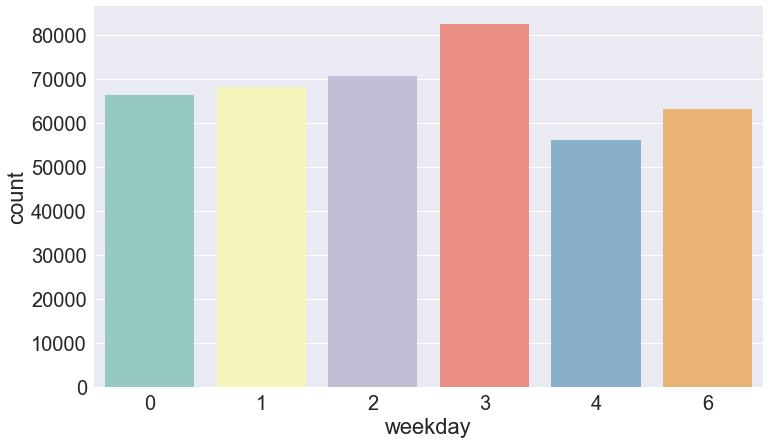

In [173]:
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.countplot(x=df['weekday'], palette="Set3")

### 4.2 Total Price

In [174]:
df['Total Price'] = df['Quantity'] * df['UnitPrice'] 

In [175]:
df['Total Price'].describe()

count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: Total Price, dtype: float64

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


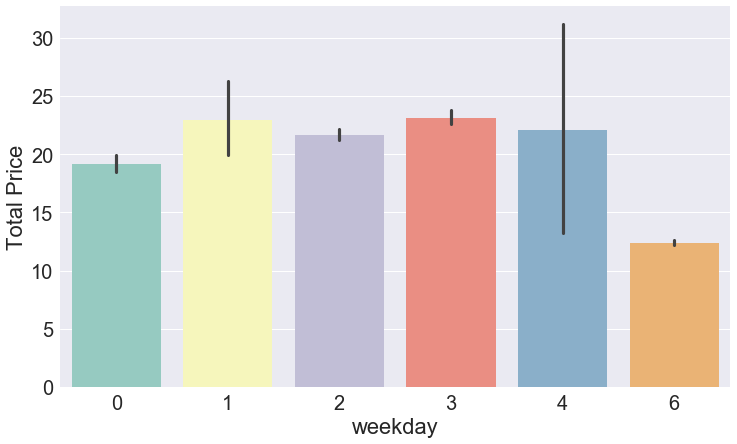

In [176]:
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.barplot(x='weekday', y='Total Price', data=df, palette="Set3")

### 4.3 Build a customer table
### 4.3.1 Invoice Count

In [177]:
invoice_count = df.groupby(by="CustomerID", as_index=False)['InvoiceNo'].count()
invoice_count.columns = ['CustomerID', 'NumberOrders']
invoice_count.describe()

,NumberOrders
count,4372.000000
mean,93.053294
std,232.471608
min,1.000000
25%,17.000000
50%,42.000000
75%,102.000000
max,7983.000000


### 4.3.2 Total Amount Each Customer Has Spent

In [178]:
total_spent = df.groupby(by="CustomerID", as_index=False)['Total Price'].sum()
total_spent.columns = ['CustomerID', 'total_spent']
total_spent.describe()

,total_spent
count,4372.000000
mean,1898.459701
std,8219.345141
min,-4287.630000
25%,293.362500
50%,648.075000
75%,1611.725000
max,279489.020000


### 4.3.3 How many Items each user has bought

In [190]:
total_items = df.groupby(by="CustomerID", as_index=False)['Quantity'].sum()
total_items.columns = ['CustomerID', 'NumberItems']
total_items.describe()

,NumberItems
count,4372.000000
mean,1122.344007
std,4672.790720
min,-303.000000
25%,153.000000
50%,365.000000
75%,962.250000
max,196719.000000


### 4.3.4 First Order and Number of Days as a Customer

In [186]:
earliest_order = df.groupby(by="CustomerID", as_index=False)['InvoiceDate'].min()
earliest_order.columns = ['CustomerID', 'EarliestInvoice']
earliest_order['now'] = pd.to_datetime((df['InvoiceDate']).max())
earliest_order['days_as_customer'] = 1 + (earliest_order.now - earliest_order.EarliestInvoice).astype('timedelta64[D]')
earliest_order.drop('now', axis=1, inplace=True)
earliest_order.head(20)

,CustomerID,EarliestInvoice,days_as_customer
0,12346,2011-01-18 10:01:00,326.0
1,12347,2010-12-07 14:57:00,367.0
2,12348,2010-12-16 19:09:00,358.0
3,12349,2011-11-21 09:51:00,19.0
4,12350,2011-02-02 16:01:00,310.0
5,12352,2011-02-16 12:33:00,297.0
6,12353,2011-05-19 17:47:00,204.0
7,12354,2011-04-21 13:11:00,232.0
8,12355,2011-05-09 13:49:00,214.0
9,12356,2011-01-18 09:50:00,326.0


### 4.3.5 Last Order and Days Since Last Purchase

In [188]:
last_order = df.groupby('CustomerID', as_index=False)['InvoiceDate'].max()
last_order.columns = ['CustomerID', 'last_purchase']
last_order['now'] = pd.to_datetime((df['InvoiceDate']).max())
last_order['days_since_purchase'] = 1 + (last_order.now - last_order.last_purchase).astype('timedelta64[D]')
last_order.drop('now', axis=1, inplace=True)
last_order.head(20)

,CustomerID,last_purchase,days_since_purchase
0,12346,2011-01-18 10:17:00,326.0
1,12347,2011-12-07 15:52:00,2.0
2,12348,2011-09-25 13:13:00,75.0
3,12349,2011-11-21 09:51:00,19.0
4,12350,2011-02-02 16:01:00,310.0
5,12352,2011-11-03 14:37:00,36.0
6,12353,2011-05-19 17:47:00,204.0
7,12354,2011-04-21 13:11:00,232.0
8,12355,2011-05-09 13:49:00,214.0
9,12356,2011-11-17 08:40:00,23.0


### 4.3.6 Combine Columns into Customer Table

In [192]:
import functools
dfs = [total_spent, invoice_count, earliest_order, last_order, total_items]
CustomerTable = functools.reduce(lambda left, right: pd.merge(left, right, on='CustomerID', how='outer'), dfs)
CustomerTable.head(20)

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems
0,12346,0.00,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197
5,12352,1545.41,95,2011-02-16 12:33:00,297.0,2011-11-03 14:37:00,36.0,470
6,12353,89.00,4,2011-05-19 17:47:00,204.0,2011-05-19 17:47:00,204.0,20
7,12354,1079.40,58,2011-04-21 13:11:00,232.0,2011-04-21 13:11:00,232.0,530
8,12355,459.40,13,2011-05-09 13:49:00,214.0,2011-05-09 13:49:00,214.0,240
9,12356,2811.43,59,2011-01-18 09:50:00,326.0,2011-11-17 08:40:00,23.0,1591


### 5.0 Statistical Analysis
### 5.1 How many Customers?

In [198]:
len(CustomerTable)

4372

### 5.2 Basic Statistics

In [199]:
CustomerTable.describe()

,total_spent,NumberOrders,days_as_customer,days_since_purchase,NumberItems
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,225.779048,92.047118,1122.344007
std,8219.345141,232.471608,118.412473,100.765435,4672.790720
min,-4287.630000,1.000000,1.000000,1.000000,-303.000000
25%,293.362500,17.000000,115.000000,17.000000,153.000000
50%,648.075000,42.000000,253.000000,50.000000,365.000000
75%,1611.725000,102.000000,332.000000,143.000000,962.250000
max,279489.020000,7983.000000,374.000000,374.000000,196719.000000


### 5.3 Find Big Spenders, Lots of Orders, Long-time customers, Dormant Customers
This will then be utilized in a sales and marketing campaign! 

In [202]:
def big_spender(row):
    if row['total_spent'] >= 1611.725:          # threshold based on 75th percentile
        return 'Yes'
    else:
        return 'No'
    
def many_orders(row):
    if row['NumberOrders'] >= 102:              # threshold based on 75th percentile
        return 'Yes'
    else:
        return 'No'
    
def loyal_customer(row):
    if row['days_as_customer'] >= 332:          # threshold based on 75th percentile
        return 'Yes'
    else: 
        return 'No'
    
def dormant_customer(row):
    if row['days_since_purchase'] >= 115:       # threshold based on 25th percentile
        return 'Yes'
    else:
        return 'No'
    
CustomerTable['BigSpender'] = CustomerTable.apply(big_spender, axis=1)
CustomerTable['ManyOrders'] = CustomerTable.apply(many_orders, axis=1)
CustomerTable['LoyalCustomer'] = CustomerTable.apply(loyal_customer, axis=1)
CustomerTable['DormantCustomer'] = CustomerTable.apply(dormant_customer, axis=1)

CustomerTable['OrderFrequency'] = CustomerTable['NumberOrders']/CustomerTable['days_as_customer']

CustomerTable.head()    

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems,BigSpender,ManyOrders,LoyalCustomer,DormantCustomer,OrderFrequency
0,12346,0.00,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0,No,No,No,Yes,0.006135
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458,Yes,Yes,Yes,Yes,0.495913
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341,Yes,No,Yes,Yes,0.086592
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631,Yes,No,No,Yes,3.842105
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197,No,No,No,Yes,0.054839


### 5.4 Look at distributions and relationships

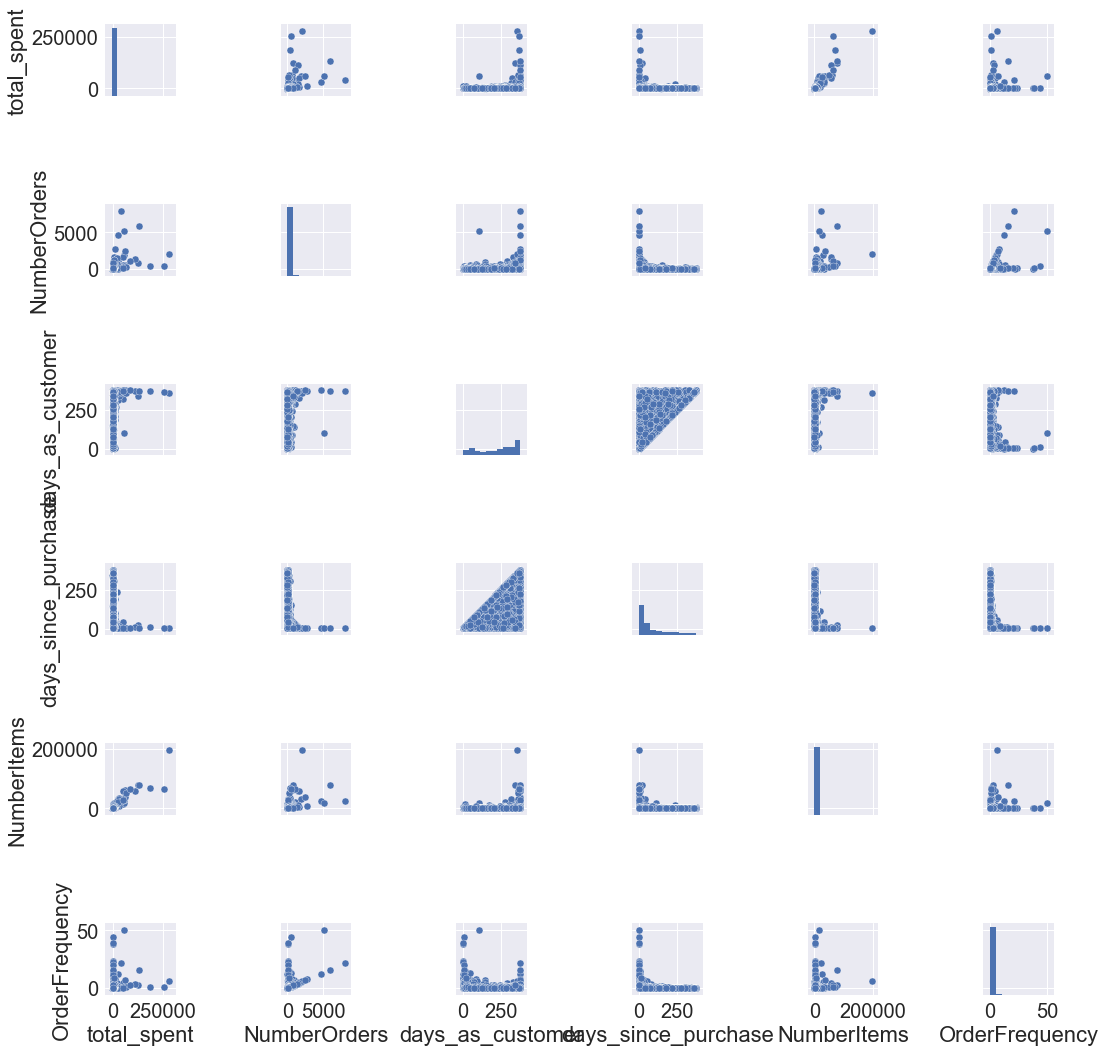

In [204]:
sns.pairplot(CustomerTable, vars=['total_spent', 'NumberOrders', 'days_as_customer', 
                                 'days_since_purchase', 'NumberItems', 'OrderFrequency'])

In [205]:
CustomerTable.head()

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems,BigSpender,ManyOrders,LoyalCustomer,DormantCustomer,OrderFrequency
0,12346,0.00,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0,No,No,No,Yes,0.006135
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458,Yes,Yes,Yes,Yes,0.495913
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341,Yes,No,Yes,Yes,0.086592
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631,Yes,No,No,Yes,3.842105
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197,No,No,No,Yes,0.054839


In [206]:
CustomerTable.describe()

,total_spent,NumberOrders,days_as_customer,days_since_purchase,NumberItems,OrderFrequency
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,225.779048,92.047118,1122.344007,0.613840
std,8219.345141,232.471608,118.412473,100.765435,4672.790720,1.803834
min,-4287.630000,1.000000,1.000000,1.000000,-303.000000,0.002674
25%,293.362500,17.000000,115.000000,17.000000,153.000000,0.096602
50%,648.075000,42.000000,253.000000,50.000000,365.000000,0.254717
75%,1611.725000,102.000000,332.000000,143.000000,962.250000,0.583333
max,279489.020000,7983.000000,374.000000,374.000000,196719.000000,50.274510


https://www.kaggle.com/carrie1/customer-insights
Leaving off: need to find time between purchases for each customer, get 75th percentile
* Create data of past past 10 purchases for all customers, fill in average for those not seen yet
* also include and days and customer potentially, total spent, potentially at some point consider order freq

In [212]:
CustomerTable[(CustomerTable['days_since_purchase'] < 100) & (CustomerTable['NumberOrders'] >= 5)].count()

CustomerID             2904
total_spent            2904
NumberOrders           2904
EarliestInvoice        2904
days_as_customer       2904
last_purchase          2904
days_since_purchase    2904
NumberItems            2904
BigSpender             2904
ManyOrders             2904
LoyalCustomer          2904
DormantCustomer        2904
OrderFrequency         2904
dtype: int64